In [1]:
import numpy as np
import sklearn
import pickle
from sklearn.ensemble import RandomForestClassifier
from preprocess import merge_main_npy
from sklearn.preprocessing import MinMaxScaler    
from sklearn.metrics import accuracy_score

# 스켈레톤이 아주 stochastic하기 때문에 5장 중 median으로 smoothing

In [2]:
def smoothed_frame_sample(scene, fps = 1, window_size = 5):
    """일정 시간에 한번씩 ... 영상 길이가 다를 경우에 뒤를 0으로 채워야함 
    """
    FPS_ORIGINAL=10 # 인 것 같음...
    
    nskip = int(FPS_ORIGINAL/fps)
    nframe = np.ceil((len(scene) - window_size)/ nskip).astype(int)

    sub = np.zeros(nframe, dtype=scene.dtype) #scene.dtype - frame

    for i in range(nframe):
        temp = scene[i*nskip:i*nskip+window_size]

        for feat in temp.dtype.names: # recarry라서 한 번에 np.mean 불가능
            sub[i][feat] = np.median(temp[feat])

    return sub


def smoothed_frame_N(scene, nframe = 10, window_size = 5, shift=0):
    FPS_ORIGINAL=10 # 인 것 같음...
    
    nskip = int((len(scene)-shift) / nframe)
    #nframe = np.ceil((len(scene) - window_size)/ nskip).astype(int)

    sub = np.zeros(nframe, dtype=scene.dtype) #scene.dtype - frame

    for i in range(nframe):
        temp = scene[i*nskip+shift:i*nskip+window_size+shift]

        for feat in temp.dtype.names: # recarry라서 한 번에 np.mean 불가능
            sub[i][feat] = np.median(temp[feat])

    return sub


def ravel_rec(sub, return_feature=False):
    vec=[]
#     if return_feature:
#         features=[]
#         for line in sub:
#             this_line=[]
#             for ff in line.dtype.names:
#                 if ff not in "frame":
#                     this_line.append(line[ff])
#                     features.append(ff)
#             vec.extend(this_line)
                    
#         return features, np.array(vec)
#     else:
    for line in sub:
        vec.extend([line[ff] for ff in line.dtype.names if ff not in "frame"])

    return np.array(vec)

In [5]:
base_dir = "/home/hoseung/Work/data/BBS/"

action = 1
nframe = 6
frame_skip = 20
feature_ready=False
cam = "e"

In [7]:
### BBS data set
main_list = f"whoismain/whoismain_{cam}_txt/main_list_{cam}_{action}.txt"
npy_list = merge_main_npy(base_dir+main_list, prefix=base_dir + f"npy_{cam}/")

scene = np.load(npy_list[0]['npy'])
data = []
label=[]

for i, fn_npy in enumerate(npy_list):
    if fn_npy['main'] in [0,1]:
        try:
        #if True:
            scene = np.load(fn_npy['npy'])
            for j in range(frame_skip):
                sub = smoothed_frame_N(scene, nframe=nframe, shift=j)

                # feature 기록
                rav_sub = ravel_rec(sub)
                data.append(rav_sub)
                label.append(fn_npy['score'])

        except:
            print("Main person was guessed, but not actually detected... ", fn_npy['npy'])


features = [ff for i in range(nframe) for ff in sub.dtype.names if ff not in "frame" ]
features = np.array(features)

data = np.stack(data)
label = np.array(label)
print(action, data.shape)

1 (8400, 180)


# Test data

In [95]:
from glob import glob

testdata_dir = "/home/hoseung/Work/Kinect_BBS_demo/G1/BT/"

score = 2 # 2 or 4

fns = glob(testdata_dir + f"{cam}_*_{action}_{score}_skeleton.pickle")

test_raw = [pickle.load(open(fn, "rb")) for fn in fns]

In [96]:
fns

['/home/hoseung/Work/Kinect_BBS_demo/G1/BT/e_16141433_1_2_skeleton.pickle',
 '/home/hoseung/Work/Kinect_BBS_demo/G1/BT/e_16174854_1_2_skeleton.pickle',
 '/home/hoseung/Work/Kinect_BBS_demo/G1/BT/e_1617504_1_2_skeleton.pickle',
 '/home/hoseung/Work/Kinect_BBS_demo/G1/BT/e_16141451_1_2_skeleton.pickle',
 '/home/hoseung/Work/Kinect_BBS_demo/G1/BT/e_16175147_1_2_skeleton.pickle']

## preprocess: 원래는 QThreadObj.select_sk*() 함수 안에서 돌아가는 부분

In [21]:
from bbsQt.model import kinect_utils as ku 
from bbsQt.model import rec_utils as ru

In [97]:
skarr = test_raw[0]
Nframe = 6

sub = ru.smoothed_frame_N(skarr, 
                        nframe=Nframe, 
                        shift=1)
skeleton = ru.ravel_rec(sub)[np.newaxis, :]

In [98]:
skeleton

array([[310. , 235. , 307. , 200. , 293. , 155. , 236. , 158. , 227. ,
        204. , 232. , 240. , 253. , 116. , 260.5, 220. , 263.5, 285.5,
        278. , 353. , 280. , 303. , 279. , 235. , 249. , 234. , 250. ,
        301. , 252. , 354. , 310. , 235. , 307. , 200. , 293. , 155. ,
        236. , 158. , 227. , 204. , 232. , 240. , 253. , 116. , 263.5,
        216.5, 265. , 282. , 278. , 353. , 280. , 303. , 279. , 235. ,
        249. , 234. , 250. , 301. , 252. , 354. , 310. , 235. , 307. ,
        200. , 293. , 155. , 236. , 158. , 227. , 204. , 232. , 240. ,
        253. , 116. , 255. , 222. , 266. , 285. , 278. , 353. , 280. ,
        303. , 279. , 235. , 249. , 234. , 250. , 301. , 252. , 354. ,
        310. , 235. , 307. , 200. , 293. , 155. , 236. , 158. , 227. ,
        204. , 232. , 240. , 253. , 116. , 265. , 221.5, 262.5, 284.5,
        278. , 353. , 280. , 303. , 279. , 235. , 249. , 234. , 250. ,
        301. , 252. , 354. , 310. , 235. , 307. , 200. , 293. , 155. ,
      

# 두 종류의 데이터셋을 잘~ 표준화하기 

## Depth 카메라의 전체 영역은 512 x 512 픽셀이고, 실제로는 512 내부의 둥근 원형의 영역, 반지름이 대략 200 정도? 

### -> 중심은 (256,256)으로 가정

In [71]:
import matplotlib.pyplot as plt 
#import seaborn as sns; sns.set()

In [39]:
data.shape

(8400, 180)

In [54]:
data[0]

array([280. , 277. , 281. , 266. , 274. , 249. , 251. , 250. , 248. ,
       268. , 252. , 279. , 263. , 239. , 262.5, 249.5, 264. , 280. ,
       279. , 321. , 280. , 296. , 270. , 280. , 258. , 280. , 251. ,
       292. , 256. , 317. , 279. , 278. , 279. , 266. , 274. , 249. ,
       252. , 248. , 246. , 266. , 250. , 277. , 266. , 240. , 263. ,
       248.5, 264. , 279.5, 277. , 315. , 280. , 293. , 270. , 279. ,
       258. , 280. , 252. , 292. , 256. , 316. , 275. , 280. , 281. ,
       267. , 279. , 248. , 255. , 245. , 244. , 257. , 247. , 273. ,
       275. , 240. , 267. , 246.5, 262. , 279. , 276. , 312. , 282. ,
       287. , 268. , 280. , 256. , 278. , 254. , 288. , 256. , 315. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. , 277. , 274. , 275. , 261. , 270. , 248. ,
       251. , 242. ,

In [82]:
# x, y 좌표 분리
xdata = data[:,::2]
ydata = data[:,1::2]

In [99]:
xsk = skeleton[0][::2]
ysk = skeleton[0][1::2]

In [100]:
def plot_band(data, frac_lower = 0.2, frac_upper = 0.8):
    lower, upper = np.quantile(data, [frac_lower, frac_upper], axis=0)
    
    x = np.arange(len(lower))

    plt.fill_between(x, lower, upper, color='b', alpha=0.2)
    represent = np.median(data, axis=0)
    plt.plot(x, represent)    

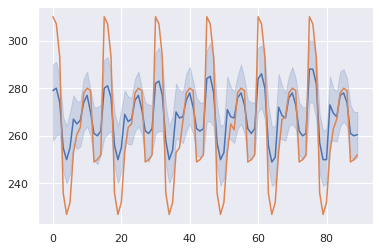

In [101]:
plot_band(xdata)
plt.plot(xsk)
plt.show()

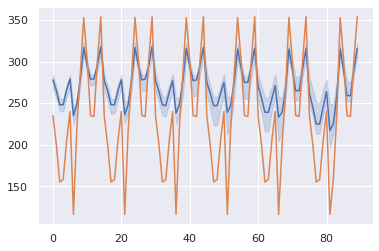

In [103]:
plot_band(ydata, 0.05, 0.95)
plt.plot(ysk)
plt.show()

1. 특정 뼈 길이로 normalize
2. 중심 위치 이동 

In [ ]:
mean_sekeleton = np.

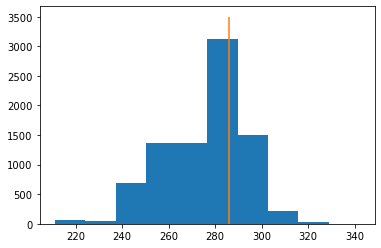

In [53]:

plt.hist(data[:,0])
plt.vlines(skeleton[0,0], 0, 3500, color='tab:orange')
plt.show()

In [ ]:
plt.hist(data[:,0])
plt.vlines(skeleton[0,0], 0, 3500, color='tab:orange')
plt.show()

In [40]:
skeleton.shape

(1, 180)

# Training RF model
## BBS 데이터셋으로 훈련하지만 새로 찍은 스켈레톤 결과도 잘 나와야함. 

In [ ]:
small = True
if small:
    ntrees = 20
    max_depth = 6
else:
    ntrees = 100
    max_depth = 7

In [17]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data, 
                                                                            label, 
                                                                            test_size=0.7, 
                                                                            stratify=label)

scaler = MinMaxScaler()
# Use whole data to impose stricter boundary condition
X_total = np.concatenate((X_test, X_train))
scaler.fit(X_total)
pickle.dump(scaler, open(f"scaler_{action}_{cam}.pickle", 'wb'))

X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=ntrees, max_depth=max_depth)
model.fit(X_train_normed, Y_train)

pred = model.predict(X_test_normed)
print("정확도 :{0:.3f}".format(accuracy_score(Y_test, pred)))

pickle.dump(model, open(f"trained_model_{action}_{cam}.pickle", "wb"))

data_to_save = {"train_x":X_train_normed, 
                 "train_y":Y_train,
                 'valid_x':X_test_normed,
                 'valid_y':Y_test}
pickle.dump(data_to_save, open(f"BBS_dataset_{action}_{cam}.pickle", "wb"))

1 (8400, 180)
정확도 :0.874
2 (8380, 180)
정확도 :0.797
3 (8340, 180)
정확도 :0.802
4 (8380, 180)
정확도 :0.860
5 (8360, 180)
정확도 :0.885
6 (8340, 180)
정확도 :0.825
7 (8380, 180)
정확도 :0.769
8 (8380, 180)
정확도 :0.831
9 (8360, 180)
정확도 :0.842
10 (8360, 180)
정확도 :0.798
11 (8360, 180)
정확도 :0.864
12 (8360, 180)
정확도 :0.888
13 (8360, 180)
정확도 :0.886
14 (8380, 180)
정확도 :0.876


In [6]:
import matplotlib.pyplot as plt 

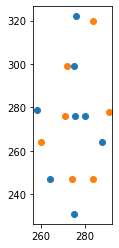

In [7]:
fig, ax = plt.subplots()
ax.scatter(ll[::4], ll[1::4])
ax.scatter(ll[2::4], ll[3::4])

ax.set_aspect("equal")
plt.show()

# Feature trackback

In [126]:
farr = dt.tree_.feature[dt.tree_.feature > 0]

In [127]:
features[farr]

array(['yhead', 'xl_knee', 'yl_hand', 'yl_hip', 'yr_foot', 'yl_shoulder',
       'xhead', 'xl_knee', 'xl_foot', 'xr_foot', 'xl_knee', 'yl_foot',
       'yl_foot', 'xl_knee', 'xl_knee', 'xr_hand', 'xr_hip',
       'yl_shoulder', 'xhead', 'yneck', 'yr_hand', 'xr_foot', 'yr_foot',
       'yl_shoulder', 'xl_foot', 'yr_shoulder', 'ypelvis', 'yr_shoulder',
       'yhead', 'xl_shoulder', 'yl_hip', 'xr_foot', 'xl_hip', 'yl_knee',
       'yr_knee', 'xr_knee', 'yr_foot', 'xl_shoulder', 'xhead',
       'yr_elbow', 'xr_shoulder', 'xr_hip', 'yhead', 'yr_hand', 'yr_hand',
       'xl_shoulder', 'yr_hand', 'yr_knee', 'yl_knee', 'yl_shoulder',
       'yr_foot', 'yhead', 'yr_foot', 'yr_hip', 'xr_shoulder'],
      dtype='<U11')

# Ablation test

# Test with new data

In [208]:
import kinect_utils as ku

import pickle
point_pickle = "/home/hoseung/Work/Kinect/pykinect_BBS/G1/000/BT/bodytracking_data.pickle"
klist = pickle.load(open(point_pickle, "rb"))

scene = ku.kinect2mobile_direct(klist)

nframe = 10 
shift=0
sub = smoothed_frame_N(scene, nframe=nframe, shift=j)
rav_sub = ravel_rec(sub)[np.newaxis, :]
pickle.dump(rav_sub, open("rav_example.pickle", "wb"))

In [206]:
pwd

'/home/hoseung/Work/fhenrf/pose'

In [193]:
model.predict(rav_sub[np.newaxis,:])

array([2])